In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

from PIL import Image
from libs import model_utils
from libs import plot_utils
from libs.custom_layers import Flatten
%matplotlib inline


custom_head = nn.Sequential(
        Flatten(),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512*7*7, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Dropout(0.5),
        nn.Linear(256, 4+20)
    )

model = model_utils.get_resnet34_model_with_custom_head(custom_head)
model.load_state_dict(torch.load('combined_model_val_77.5.ckpt', map_location='cpu'))

def get_category_to_label(id):
    id_to_cat = {
        0: 'car',
        1: 'horse',
        2: 'person',
        3: 'aeroplane',
        4: 'train',
        5: 'dog',
        6: 'chair',
        7: 'boat',
        8: 'bird',
        9: 'pottedplant',
        10: 'cat',
        11: 'sofa',
        12: 'motorbike',
        13: 'tvmonitor',
        14: 'bus',
        15: 'sheep',
        16: 'diningtable',
        17: 'bottle',
        18: 'cow',
        19: 'bicycle'}
    return id_to_cat[id]   


def plot_results_on_single_img(im_path):
    im = Image.open(im_path)
    
    sz = 224
    test_tfms = transforms.Compose([
        transforms.Resize((sz, sz)),
        transforms.ToTensor()
    ])
    test_im_tensor = test_tfms(im)[None]
    
    pred_bbox, pred_cat_id = model_utils.test_on_single_image(test_im_tensor, model, sz)
    plot_utils.plot_model_result_on_test_image(pred_bbox, pred_cat_id, get_category_to_label, im_path)

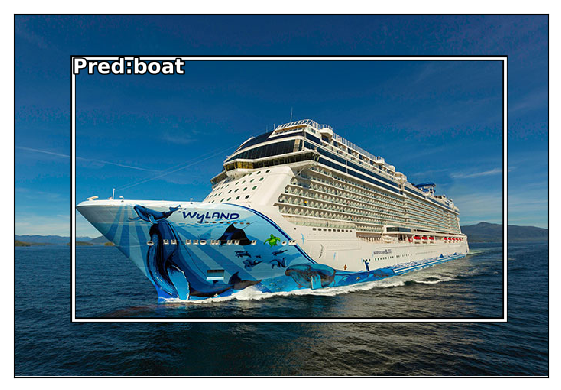

In [2]:
im_path = 'test_images/HERO_Bliss_072618.jpg'
plot_results_on_single_img(im_path)

In [3]:
def test_model_on_img(im):
    sz = 224
    test_tfms = transforms.Compose([
        transforms.Resize((sz, sz)),
        transforms.ToTensor()
    ])
    test_im_tensor = test_tfms(im)[None]
    
    pred_bbox, pred_cat_id = model_utils.test_on_single_image(test_im_tensor, model, sz)
    return plot_utils.get_result_on_test_image(pred_bbox, pred_cat_id, get_category_to_label, im)

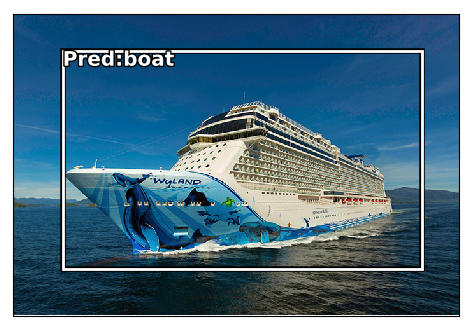

In [7]:
x = test_model_on_img(Image.open(im_path))

In [8]:
x